# **Importing the Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

<ipython-input-1-5e47ac678176>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
dataset = pd.read_csv('healthcare-dataset-stroke-data.csv')
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
dataset.describe(include = 'all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# **Exploratory Data Analysis**

In [6]:
dataset['is_Stroke'] = ' '
for i in range(len(dataset)):
    if dataset['stroke'][i] == 1:
        dataset['is_Stroke'][i] = 'Yes'
    else:
        dataset['is_Stroke'][i] = 'No'

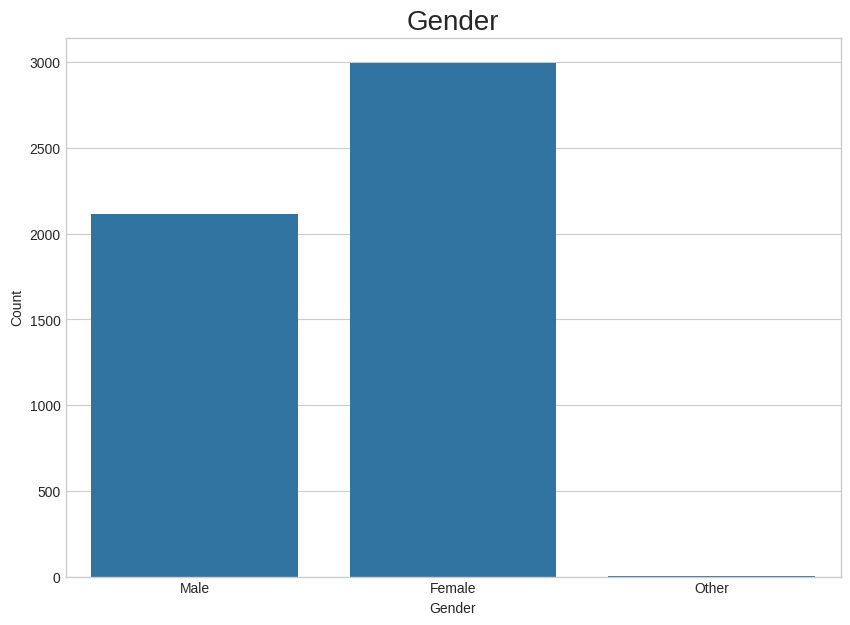

In [7]:
plt.figure(figsize = (10, 7))
sns.countplot(x = dataset['gender'])
plt.title('Gender', fontsize = 20)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

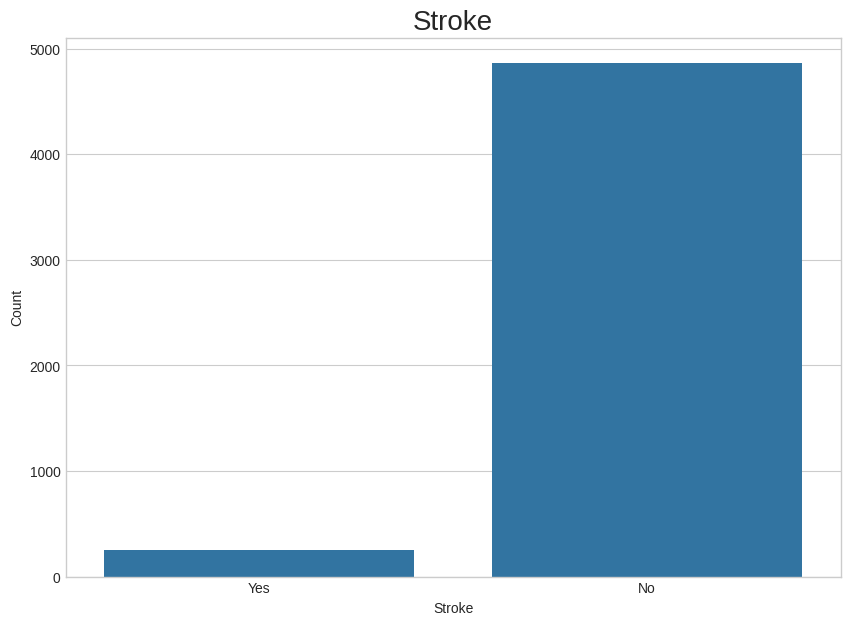

In [8]:
plt.figure(figsize = (10, 7))
sns.countplot(x = dataset['is_Stroke'])
plt.title('Stroke', fontsize = 20)
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

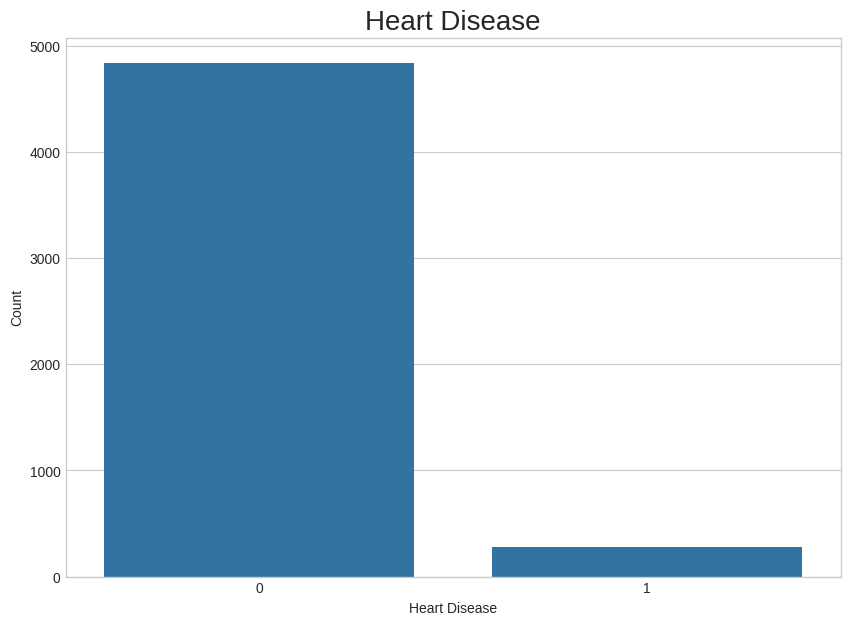

In [9]:
plt.figure(figsize = (10, 7))
sns.countplot(x = dataset['heart_disease'])
plt.title('Heart Disease', fontsize = 20)
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

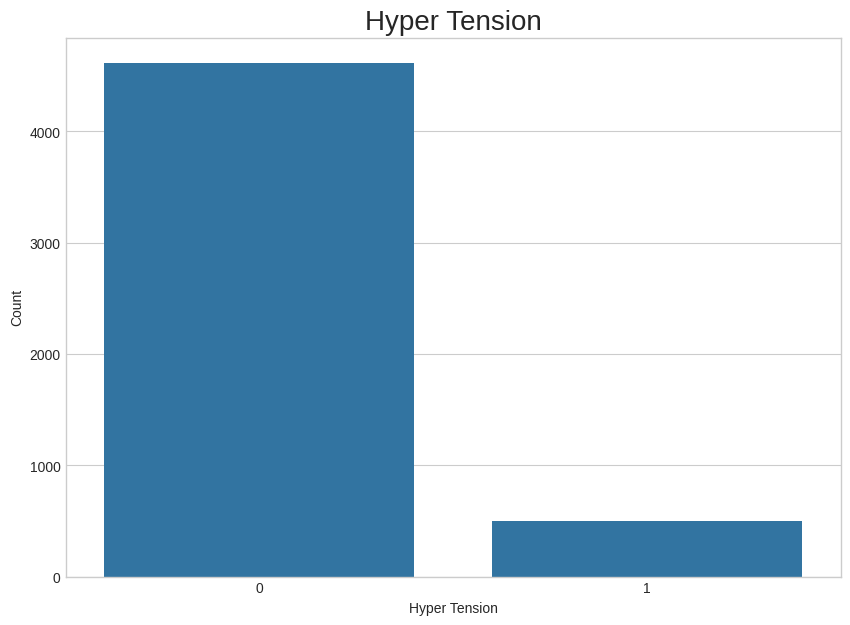

In [10]:
plt.figure(figsize = (10, 7))
sns.countplot(x = dataset['hypertension'])
plt.title('Hyper Tension', fontsize = 20)
plt.xlabel('Hyper Tension')
plt.ylabel('Count')
plt.show()

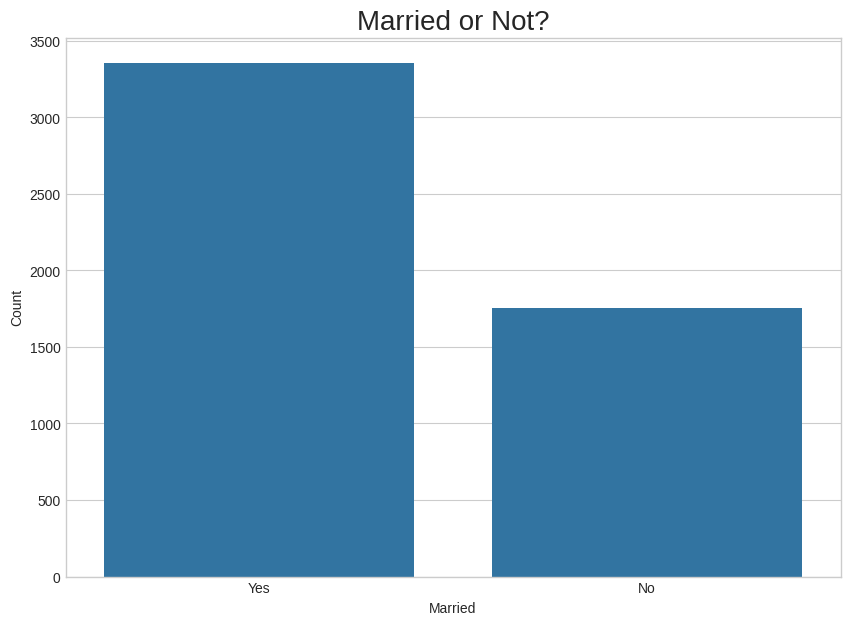

In [11]:
plt.figure(figsize = (10, 7))
sns.countplot(x = dataset['ever_married'])
plt.title('Married or Not?', fontsize = 20)
plt.xlabel('Married')
plt.ylabel('Count')
plt.show()

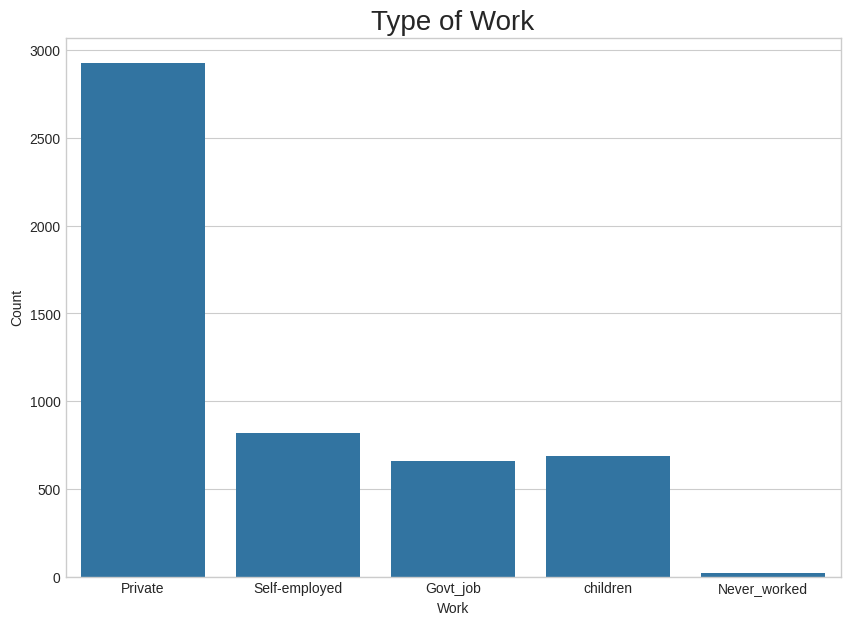

In [12]:
plt.figure(figsize = (10, 7))
sns.countplot(x = dataset['work_type'])
plt.title('Type of Work', fontsize = 20)
plt.xlabel('Work')
plt.ylabel('Count')
plt.show()

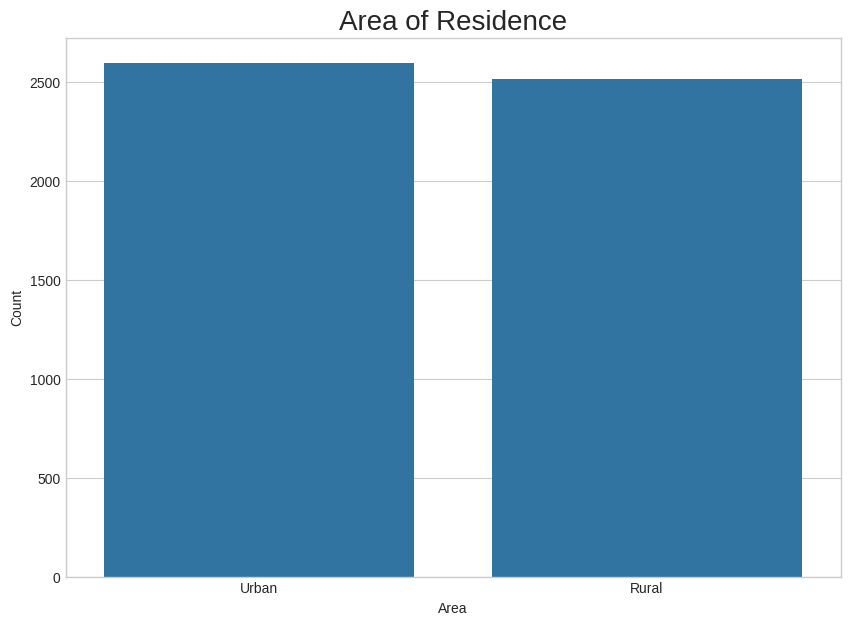

In [13]:
plt.figure(figsize = (10, 7))
sns.countplot(x = dataset['Residence_type'])
plt.title('Area of Residence', fontsize = 20)
plt.xlabel('Area')
plt.ylabel('Count')
plt.show()

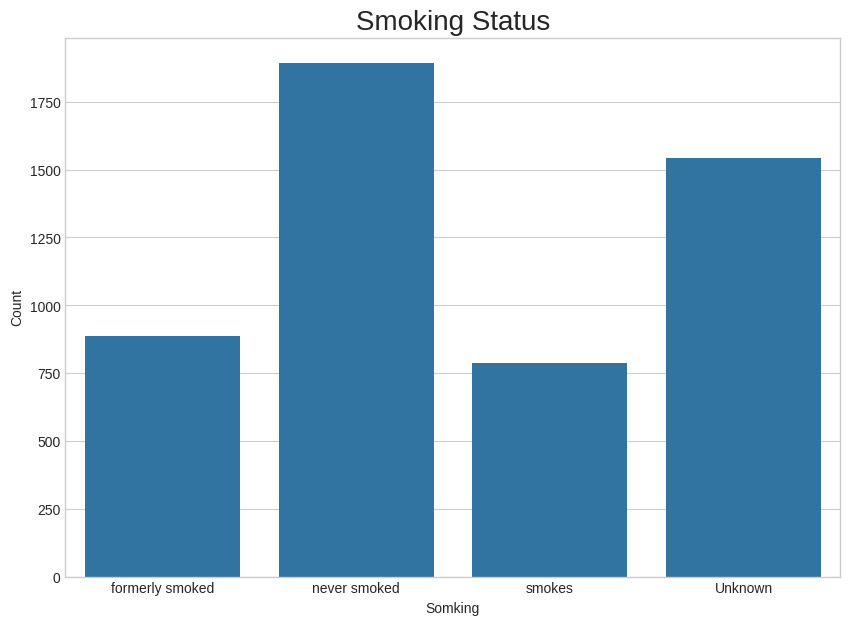

In [14]:
plt.figure(figsize = (10, 7))
sns.countplot(x = dataset['smoking_status'])
plt.title('Smoking Status', fontsize = 20)
plt.xlabel('Somking')
plt.ylabel('Count')
plt.show()

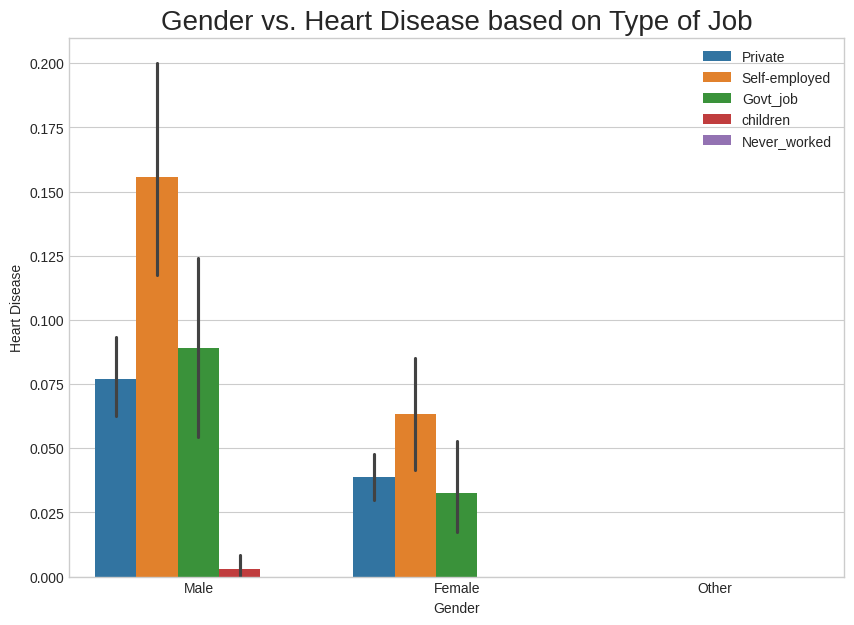

In [15]:
plt.figure(figsize = (10, 7))
sns.barplot(x = dataset['gender'], y = dataset['heart_disease'], hue = dataset['work_type'])
plt.legend(loc = 'upper right')
plt.title('Gender vs. Heart Disease based on Type of Job', fontsize = 20)
plt.xlabel('Gender')
plt.ylabel('Heart Disease')
plt.show()

# **Feature Engineering (Data Preprocessing)**

In [16]:
dataset.drop(['is_Stroke', 'id'], axis = 1, inplace = True)
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#Encoding all the necessary columns

In [17]:
gender = pd.get_dummies(dataset['gender'], drop_first = True)
married = pd.get_dummies(dataset['ever_married'], drop_first = True)
work = pd.get_dummies(dataset['work_type'], drop_first = True)
residence = pd.get_dummies(dataset['Residence_type'], drop_first = True)
smoking = pd.get_dummies(dataset['smoking_status'], drop_first = True)
dataset = pd.concat([gender, married, work, residence, smoking, dataset], axis = 1)

# Dropping all the unecessary columns

In [18]:
dataset.drop(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], axis = 1, inplace = True)
dataset.head()

,Male,Other,Yes,Never_worked,Private,Self-employed,children,Urban,formerly smoked,never smoked,smokes,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,1,0,1,0,1,0,0,1,1,0,0,67.0,0,1,228.69,36.6,1
1,0,0,1,0,0,1,0,0,0,1,0,61.0,0,0,202.21,NaN,1
2,1,0,1,0,1,0,0,0,0,1,0,80.0,0,1,105.92,32.5,1
3,0,0,1,0,1,0,0,1,0,0,1,49.0,0,0,171.23,34.4,1
4,0,0,1,0,0,1,0,0,0,1,0,79.0,1,0,174.12,24.0,1


# Filling the Missing values of BMI (Using KNN Imputation)

In [19]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
dataset = pd.DataFrame(imputer.fit_transform(dataset), columns = dataset.columns)

In [20]:
dataset.isnull().sum()

Male                 0
Other                0
Yes                  0
Never_worked         0
Private              0
Self-employed        0
children             0
Urban                0
formerly smoked      0
never smoked         0
smokes               0
age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
stroke               0
dtype: int64

In [21]:
dataset.rename(columns = {'Yes': 'ever_married'}, inplace = True)
dataset.head()

,Male,Other,ever_married,Never_worked,Private,Self-employed,children,Urban,formerly smoked,never smoked,smokes,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,67.0,0.0,1.0,228.69,36.600000,1.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,61.0,0.0,0.0,202.21,28.893237,1.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,80.0,0.0,1.0,105.92,32.500000,1.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,49.0,0.0,0.0,171.23,34.400000,1.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,79.0,1.0,0.0,174.12,24.000000,1.0


# **Classification Model**

# Splitting the Dataset into Training and Test set

In [22]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Appyling SMOTEENN Algorithm to handle the unbalanced 'stroke' column

In [23]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library
from imblearn.combine import SMOTEENN
sm = SMOTEENN(random_state = 0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 184
Before OverSampling, counts of label '0': 3648 

After OverSampling, the shape of train_X: (6147, 16)
After OverSampling, the shape of train_y: (6147,) 

After OverSampling, counts of label '1': 3401
After OverSampling, counts of label '0': 2746


#Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter = 300)
log.fit(X_train_res, y_train_res)

y_pred_log = log.predict(X_test)

In [25]:
print("The Training Score of Logistic Regression is: {}%".format(log.score(X_train_res, y_train_res)*100))
print("The Accuracy Score of Logistic Regression is: {}%".format(accuracy_score(y_test, y_pred_log)*100))
print("The Confusion Matrix for Logistic Regression is: \n{}\n".format(confusion_matrix(y_test, y_pred_log)))
print('\n')
print(classification_report(y_test, y_pred_log))

The Training Score of Logistic Regression is: 85.89555880917521%
The Accuracy Score of Logistic Regression is: 70.4225352112676%
The Confusion Matrix for Logistic Regression is: 
[[850 363]
 [ 15  50]]



              precision    recall  f1-score   support

         0.0       0.98      0.70      0.82      1213
         1.0       0.12      0.77      0.21        65

    accuracy                           0.70      1278
   macro avg       0.55      0.73      0.51      1278
weighted avg       0.94      0.70      0.79      1278



In [26]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(X_train_res, y_train_res)

y_pred_dt = dt.predict(X_test)

In [27]:
print("The Training Score of Decision Tree is: {}%".format(dt.score(X_train_res, y_train_res)*100))
print("The Accuracy Score of Decision Tree is: {}%".format(accuracy_score(y_test, y_pred_dt)*100))
print("The Confusion Matrix for Decision Tree is: \n{}\n".format(confusion_matrix(y_test, y_pred_dt)))
print('\n')
print(classification_report(y_test, y_pred_dt))

The Training Score of Decision Tree is: 100.0%
The Accuracy Score of Decision Tree is: 85.05477308294209%
The Confusion Matrix for Decision Tree is: 
[[1062  151]
 [  40   25]]



              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92      1213
         1.0       0.14      0.38      0.21        65

    accuracy                           0.85      1278
   macro avg       0.55      0.63      0.56      1278
weighted avg       0.92      0.85      0.88      1278

